<a href="https://colab.research.google.com/github/saahilahujaa/Passenger-Fare-Amount-Prediction/blob/main/Passenger_Fare_Amount_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Passenger Fare Amount Prediction**

## **Objective** 

## **Importing Neccessary Libraries**
Now in this section we'll import all the neccessary libraries and packages we'll require to develop the required model. Libraries like Pandas(and numpy), matplotlib(and seaborn) and sklearn are required for data manipulation, visualization and Machine Learning respectively.

In [ ]:
# Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data manipulation libraries.
import pandas as pd
import numpy as np

# Datatime library for Date columns.
from datetime import datetime
import datetime as dt
from operator import itemgetter

# Importing preprocessing libraries. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing model selection libraries.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Importing from math library
from math import radians, cos, sin, asin, sqrt

# importing XGB regressor.
from xgboost import XGBRegressor

# Import metrics libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing graphviz for visualizing decision trees.
import graphviz
import sklearn.tree as tree

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')


## **Data Gathering and Discovery**
Now in this section we'll import all the neccessary libraries and packages we'll require to develop the required model. Libraries like Pandas(and numpy), matplotlib(and seaborn) and sklearn are required for data manipulation, visualization and Machine Learning respectively.

In [ ]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# The variable Data_path contains the path of dataset stored in drive.
data_path = "/content/drive/MyDrive/Alma Better/Capstone Projects/Passenger Fare Amount Prediction/"

# Importing Cardiovascular risk Data File.
trip_df = pd.read_csv(data_path + "trip.csv")

# Show the dataframe.
trip_df

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


Now lets see the first few rows to the dataset to understand the data and see what all attributes are present in the data file.

In [ ]:
# First 5 rows of dataset.
trip_df.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
# Shape of the data file (rows, columns).
trip_df.shape

(200000, 9)

The dataset contains the details of various trips when customers booked the taxi to reach their respective destination. It includes 2,00,000 records and 9 attributes.

**Data Description and Attributes:-**

*   index - a unique identifier for each trip.

*   key - timestamp when the meter was engaged.

*   pickup_datetime - date and time when the meter was engaged.

*   passenger_count - the number of passengers in the vehicle (driver entered value).

*   pickup_longitude - the longitude where the meter was engaged.

*   pickup_latitude - the latitude where the meter was engaged.

*   dropoff_longitude - the longitude where the meter was disengaged.

*   dropoff_latitude - the latitude where the meter was disengaged.

**Dependent Variable:-**

*   ***fare_amount - the cost of each trip in USD.***

In [ ]:
# Description of all columns in the dataset.
trip_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,200000.0,NaN,NaN,NaN,27712503.68235,16013822.212829,1.0,13825346.25,27745495.0,41555300.75,55423567.0
key,200000,200000,2015-05-07 19:52:06.0000003,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare_amount,200000.0,NaN,NaN,NaN,11.359955,9.901776,-52.0,6.0,8.5,12.5,499.0
pickup_datetime,200000,196629,2014-04-13 18:19:00 UTC,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_longitude,200000.0,NaN,NaN,NaN,-72.527638,11.437787,-1340.64841,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,200000.0,NaN,NaN,NaN,39.935885,7.720539,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,NaN,NaN,NaN,-72.525292,13.117408,-3356.6663,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,NaN,NaN,NaN,39.92389,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,200000.0,NaN,NaN,NaN,1.684535,1.385997,0.0,1.0,1.0,2.0,208.0


In [ ]:
# Brief information about the datatype of attributes and their null counts. 
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


We can see that the data is very clean with just 1 null value in dropoff_longitude and dropoff_latitude.

In [ ]:
  # Looking for duplicate data points
  duplicates = trip_df[trip_df.duplicated()]
  duplicates

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


We can see that there are no duplicate records.


## **EDA and Feature Engineering**

Exploratory data analysis or commonly known as EDA helps to explore data, and possibly formulate hypotheses that might cause new data collection and experiments. EDA build a robust understanding of the data, issues associated with either the info or process. It’s a scientific approach to get the story of the data.

It focuses more narrowly on checking assumptions required for model fitting and hypothesis testing. It also helps while handling missing values and making transformations of variables as needed. Also we'd deal with outliers in this section. Furthermore, we'll try to extract or convert some of the attributes using some feature engineering.

All machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristics to work properly. Here, the need for feature engineering arises. Feature engineering mainly have two goals:

* Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
* Improving the performance of machine learning models.

*Lets just start by removing all null values from the data.*

In [ ]:
# Removing the row(s) having null values
df = trip_df.dropna()
df

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


The index and key don't contribute much as we already have the pickup_datetime and it would'nt be of much help to the model either. Hence, we can drop these columns too.

In [ ]:
# Dropping the "id" column.
df = df.drop(columns=['index', 'key'])

Now lets have a look at the remaining columns.

In [ ]:
# Print all columns.
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
df['pickup_datetime'] =  pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [ ]:
# We will separate the Pickup_datetime column into separate field like year, month, day of the week, etc

df['year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Date'] = df['pickup_datetime'].dt.day
df['Day'] = df['pickup_datetime'].dt.dayofweek
df['Hour'] = df['pickup_datetime'].dt.hour

### Passenger Count

In [ ]:
# Looking at the number of passengers travellers book a taxi for
df['passenger_count'].value_counts()

1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         708
208         1
Name: passenger_count, dtype: int64

Here we can see that the majority of the taxis which were booked had only a single passenger travelling.

Also a few of the taxis which were booked had 0 passengers. This is practically not possible. 0 might be just used to fill up the null values or some misinformation.

Also we can see that there were 208 passengers in a single trip which is not possible. So we can remove that as it acts as an anomally for our models and might affect its performance. Even if we consider SUV, there couldn't be more than 6 passengers.

In [ ]:
df = df.drop((df[df['passenger_count']>6]).index, axis=0)
df = df.drop((df[df['passenger_count']<1]).index, axis=0)

In [ ]:
# Looking at the target variable 'fare_amount'
df['fare_amount'].describe()

count    199290.000000
mean         11.366713
std           9.910588
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

As observed, the minimum fare is a negative amount which means we might have data points having negative fare amount. We'll remove such points.

In [ ]:
# Dropping rows with value of fare_amount less than or equal to 0
df = df.drop(df[df["fare_amount"] <= 0].index, axis=0)
# df = df.drop(df[df["fare_amount"] > 200].index, axis=0)

In [ ]:
df.shape

(199268, 12)

Now let's check the pickup latiotude and longitude.

In [ ]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# We need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#train = train.drop(train[train['pickup_latitude']<-90])
df[df['pickup_latitude']<-90]
df[df['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour
56617,8.1,2012-03-11 07:24:00,-73.960828,404.433332,-73.988357,40.769037,1,2012,3,11,6,7
61793,8.5,2012-06-13 05:45:00,-73.951385,401.066667,-73.982110,40.754117,1,2012,6,13,2,5
75851,15.7,2011-11-05 00:22:00,-1340.648410,1644.421482,-3356.666300,872.697628,1,2011,11,5,5,0
91422,16.1,2011-05-18 13:24:00,57.418457,1292.016128,1153.572603,-881.985513,1,2011,5,18,2,13


In [ ]:
# Hence dropping values for such cases
df = df.drop((df[df['pickup_latitude']<-90]).index, axis=0)
df = df.drop((df[df['pickup_latitude']>90]).index, axis=0)

In [ ]:
# Removing all such cases if there in our dataset
df = df.drop((df[df['pickup_longitude']<-90]).index, axis=0)
df = df.drop((df[df['pickup_longitude']>90]).index, axis=0)
df = df.drop((df[df['dropoff_latitude']<-90]).index, axis=0)
df = df.drop((df[df['dropoff_latitude']>90]).index, axis=0)
df = df.drop((df[df['dropoff_longitude']<-90]).index, axis=0)
df = df.drop((df[df['dropoff_longitude']>90]).index, axis=0)


In [ ]:
df.shape

(199255, 12)

***Now we have successfully cleared our dataset. Thus proceeding for further operations:***

### Calculating Distance

*Now the next very important task is to calculate the distance btetween the pickup and the drop locations using the latitudes and longitudes.*

In [ ]:
# As we know that we have been given the pickup longitute and latitude values and same for the dropoff. 
# So we need to calculate the distance using the haversine formula and we will create a new variable called distance
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [ ]:
# Making a new column distance where we'll apply the haversine function created above.
df['distance'] = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [ ]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,distance
0,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,1.683323
1,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,2.457590
2,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,5.036377
3,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,1.661683
4,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,4.475450


In [ ]:
df['distance'].describe()

count    199255.000000
mean         20.303433
std         376.768881
min           0.000000
25%           1.215419
50%           2.121935
75%           3.875758
max        8782.898606
Name: distance, dtype: float64

We can observe that the minimum distance is 0 so we need to remove such data points.

In [ ]:
# checking the distance which is equal to 0.
from collections import Counter 
Counter(df['distance'] == 0)

Counter({False: 193643, True: 5612})

In [ ]:
# Removing the cases where distance is equal to 0
df = df.drop((df[df['distance'] == 0]).index, axis=0)

Now we have splitted the pickup date time variable into different varaibles like month, year, day etc so now we dont need to have that pickup_Date variable now. Hence we can drop that, Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

In [ ]:
df.shape

(193643, 13)

In [ ]:
# drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
df = df.drop('pickup_datetime', axis = 1)

In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,4.475450


### **Data Visualization**

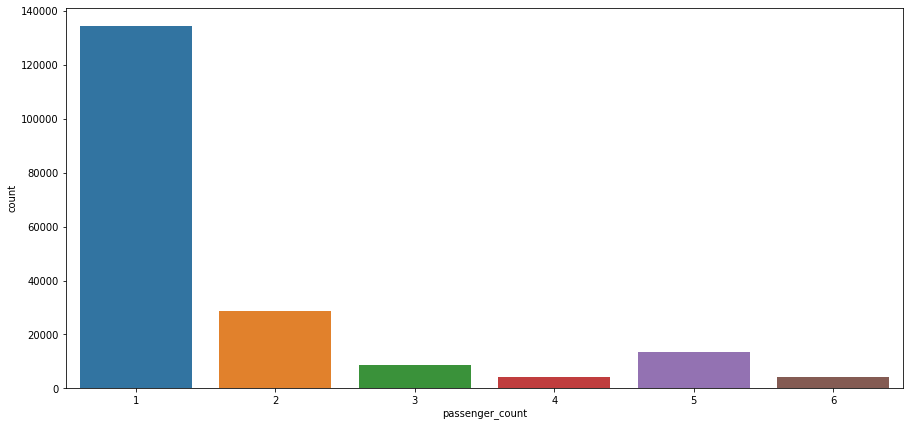

In [ ]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x = "passenger_count", data=df)

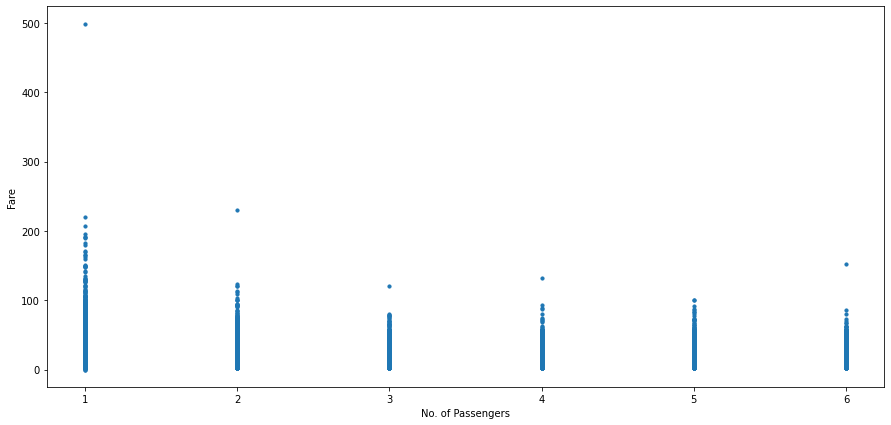

In [ ]:
#Relationship beetween number of passengers and Fare
plt.figure(figsize=(15,7))
plt.scatter(x = df['passenger_count'], y = df['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

***Observations:***

1.   Single travelling passengers are most frequent travellers.
2.   At the sametime we can also conclude that highest Fare are coming from single & double travelling passengers.



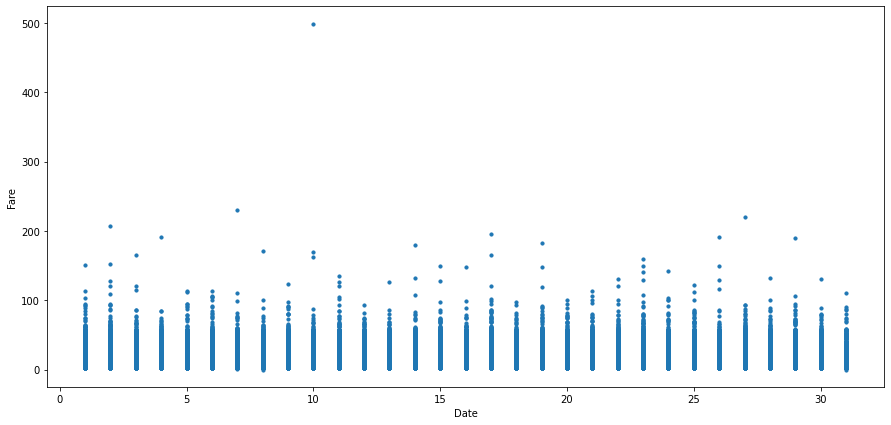

In [ ]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x = df['Date'], y = df['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

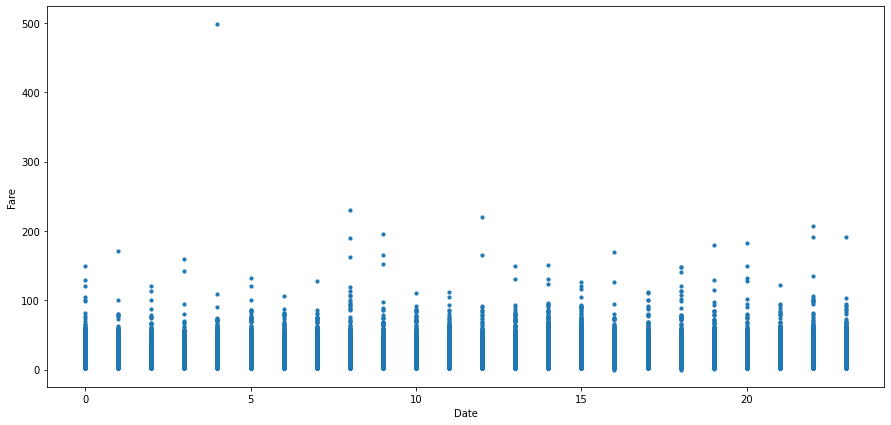

In [ ]:
#Relationship between hour and Fare
plt.figure(figsize=(15,7))
plt.scatter(x = df['Hour'], y = df['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

*From the above plot we can observe that the cabs taken at 12 am, 8 am and 8 pm are the costliest. Hence we can assume that cabs taken early in morning and late at night are costliest* 

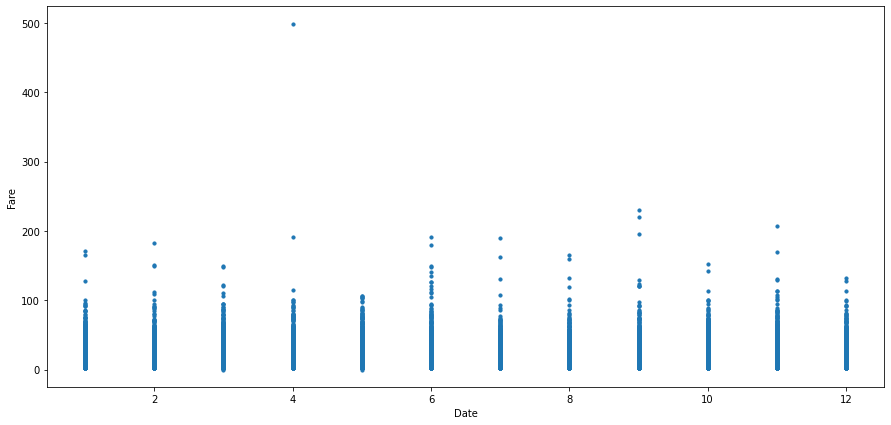

In [ ]:
#Relationship between month and Fare
plt.figure(figsize=(15,7))
plt.scatter(x = df['Month'], y = df['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

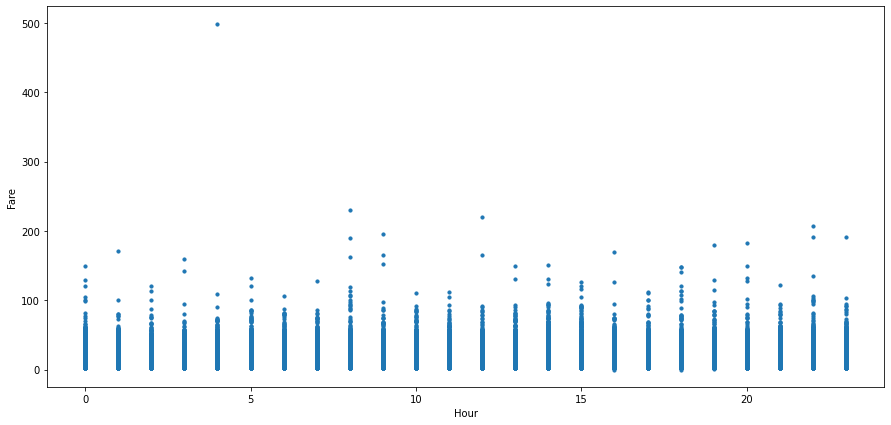

In [ ]:
#Relationship between hour and Fare
plt.figure(figsize=(15,7))
plt.scatter(x = df['Hour'], y = df['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

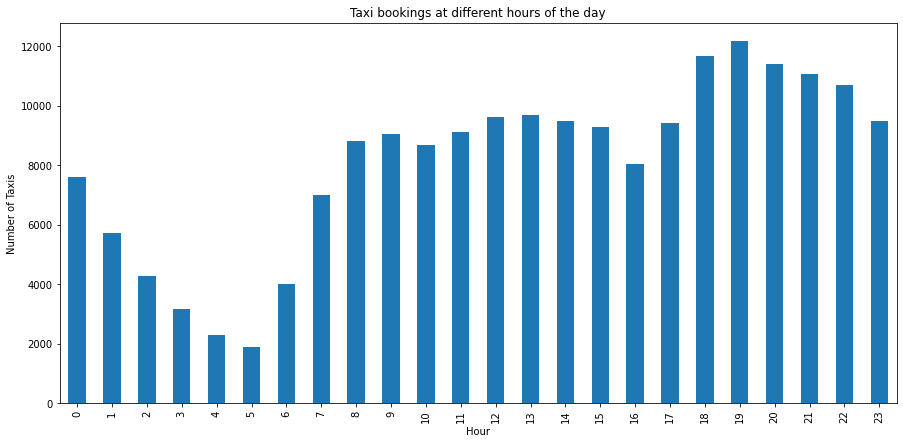

In [ ]:
plt.figure(figsize=(15,7))
df.groupby(df["Hour"])['Hour'].count().plot(kind="bar")
plt.xlabel('Hour')
plt.ylabel('Number of Taxis')
plt.title('Taxi bookings at different hours of the day')
plt.show()

*Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours* 

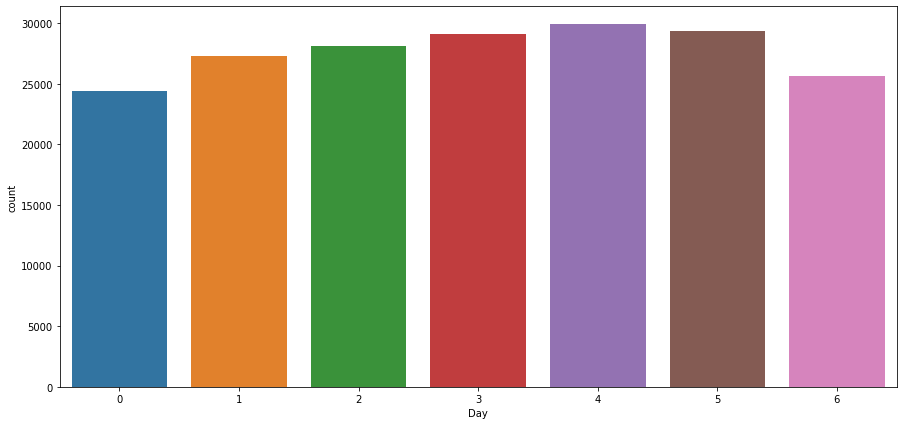

In [ ]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=df)

*The day of the week does not seem to have much influence on the number of cabs rides*

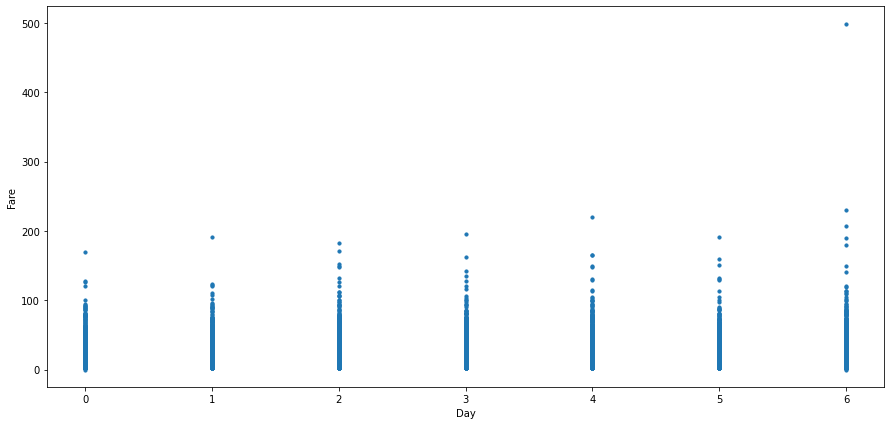

In [ ]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x = df['Day'], y = df['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

No such conclusions can be made based on the day of the week.

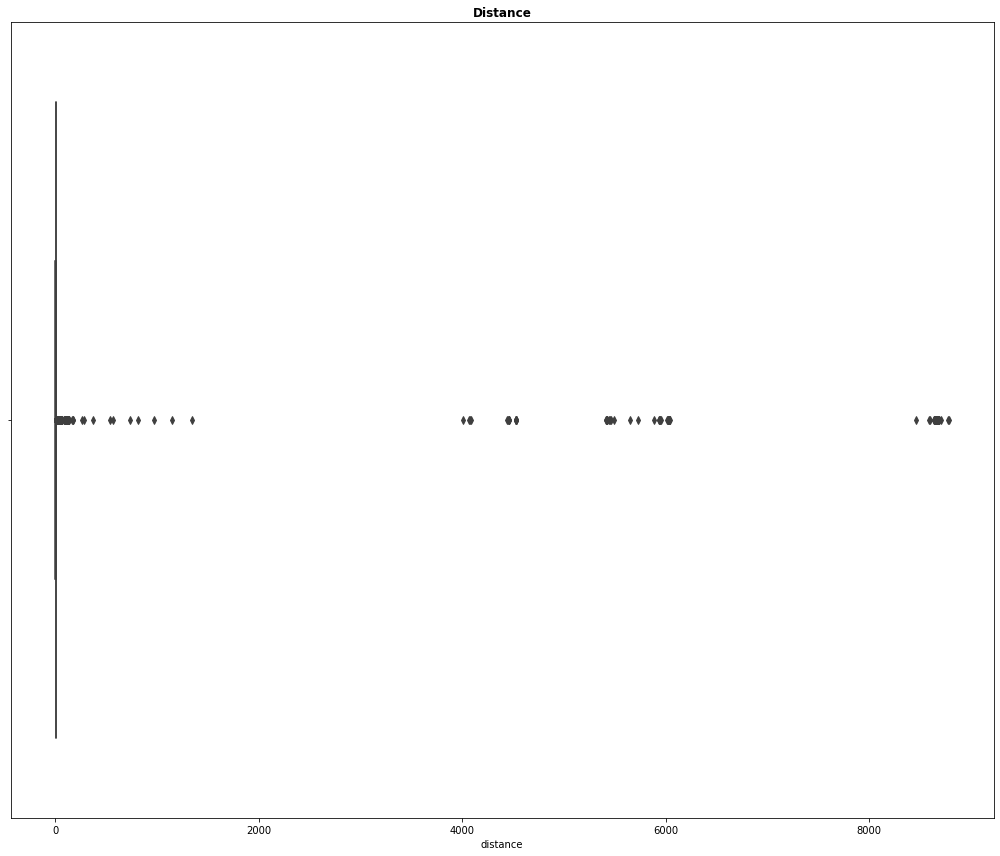

In [ ]:
# Define a figure.
plt.figure(figsize=(14,12))

# Box plot distribution
sns.boxplot(df['distance'])
plt.title('Distance', weight='bold')
plt.tight_layout()

We can observe that for a few data points have a large distance value. This might be the case when someone plans to go on a long road trip via taxi.

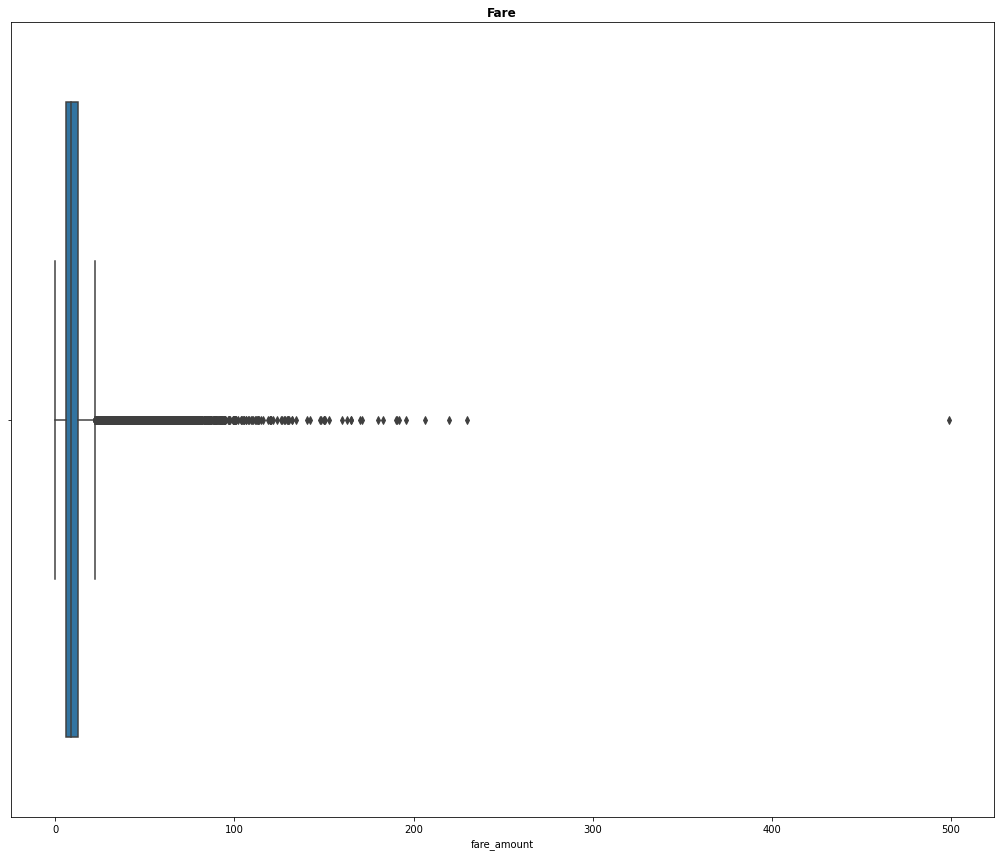

In [ ]:
# Define a figure.
plt.figure(figsize=(14,12))

# Box plot distribution
sns.boxplot(df['fare_amount'])
plt.title('Fare', weight='bold')
plt.tight_layout()

In [ ]:
# Dropping the extreme outliers for our target variable
df = df.drop(df[df["fare_amount"] > 200].index, axis=0)

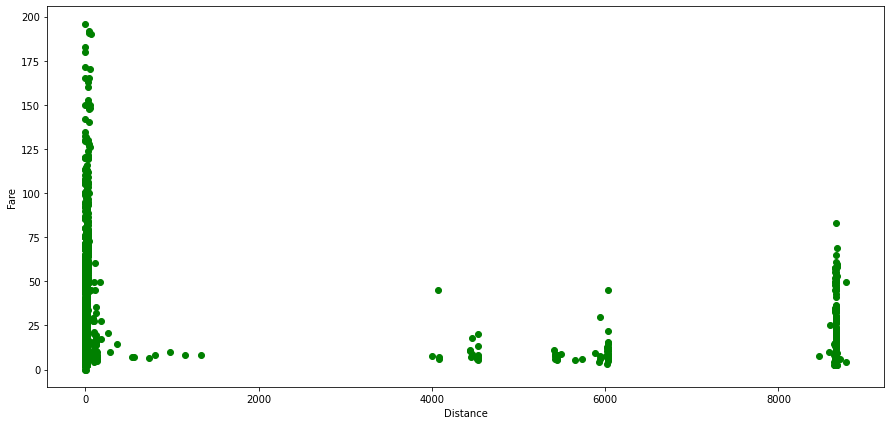

In [ ]:
#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = df['distance'],y = df['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

It is quite obvious that distance will effect the amount of fare

## **Feature Scaling**

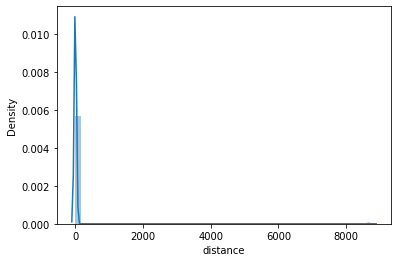

In [ ]:
#Normality check if data is uniformly distributed or not-
sns.distplot(df['distance'])

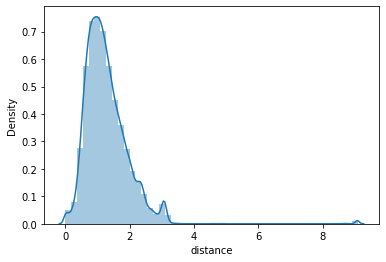

In [ ]:
# Since skewness of distance variable is high, apply log transform to reduce the skewness-
df['distance'] = np.log1p(df['distance'])
sns.distplot(df['distance'])

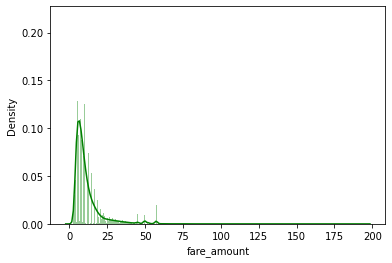

In [ ]:
# distribution plot for fare amount.
sns.distplot(df['fare_amount'],bins='auto',color='green')
plt.ylabel("Density")
plt.show()

In [ ]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
df['fare_amount'] = np.log1p(df['fare_amount'])

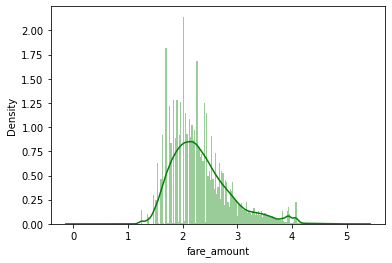

In [ ]:
#dist plot after applying log transform on fare amount.
sns.distplot(df['fare_amount'],bins='auto',color='green')
plt.ylabel("Density")
plt.show()

## **Splitting the Dataframe into train and test sets**.
***
Now that the Dataset is cleaned and we have added all the neccessary features along with some conversions of categorical features. Its time to split the data into training and testing sets.

Note:- These training and testing data are going to be same for all the model we'll build such that all of the models are evaluated on a same set of parameters.

In [ ]:
# Lets have a look at the data before going futther with splitting.
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,distance
0,2.140066,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,0.987056
1,2.163323,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,1.240572
2,2.631889,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,1.797804
3,1.840550,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,0.978959
4,2.833213,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,1.700274
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1.386294,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,6,10,0.106349
199996,2.140066,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,4,1,1.056070
199997,3.462606,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,0,0,2.628308
199998,2.740840,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,2,14,1.512864


In [ ]:
# independent variables
X = df[list(df.columns)[1:]]

# dependent variable
y = df["fare_amount"]

In [ ]:
# display independent variables dataframe
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,distance
0,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,0.987056
1,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,1.240572
2,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,1.797804
3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,0.978959
4,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,1.700274
...,...,...,...,...,...,...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,6,10,0.106349
199996,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,4,1,1.056070
199997,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,0,0,2.628308
199998,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,2,14,1.512864


In [ ]:
# display dependent variable dataframe
y

0         2.140066
1         2.163323
2         2.631889
3         1.840550
4         2.833213
            ...   
199995    1.386294
199996    2.140066
199997    3.462606
199998    2.740840
199999    2.714695
Name: fare_amount, Length: 193639, dtype: float64

In [ ]:
# calling train_test_split() to get the training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

# split sizes
print(X_train.shape)
print(X_test.shape)

(145229, 11)
(48410, 11)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193639 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193639 non-null  float64
 1   pickup_longitude   193639 non-null  float64
 2   pickup_latitude    193639 non-null  float64
 3   dropoff_longitude  193639 non-null  float64
 4   dropoff_latitude   193639 non-null  float64
 5   passenger_count    193639 non-null  int64  
 6   year               193639 non-null  int64  
 7   Month              193639 non-null  int64  
 8   Date               193639 non-null  int64  
 9   Day                193639 non-null  int64  
 10  Hour               193639 non-null  int64  
 11  distance           193639 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 19.2 MB


##**Models**
***
Now its time to implement the Machine Learning models and check the accuracy of each model to point out the best one out of all. In this project we are implementing 7 machine learning algorithms to predict the target variable and then we'll apply optimization techniques on the one that gives best resulting accuracy out of all.

Following algorithms have been used for predictions:-

* Linear Regression 
* Lasso Regression
* Ridge Regression
* Elastic Net Regression
* Decision Tree
* Random Forest Regression
* XGB Regression

### **Linear Regression**

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, rather than trying to classify them into categories. There are two main types:

**Simple regression**:

Simple linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction.

**y=mx+b**

**Multivariable regression**:

A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.

**f(x,y,z)=w1x+w2y+w3z**

In [ ]:
# building the model and fitting training data
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# checking the score
reg.score(X_train, y_train)

0.7023192463446557

In [ ]:
# check the coefficeints
reg.coef_

array([-1.11550671e-01, -1.08433710e-01, -1.00042013e-01, -9.65704459e-02,
        4.53419408e-03,  3.74610205e-02,  5.67175073e-03,  1.95131272e-04,
       -2.95396197e-03,  3.23368502e-04,  7.14611226e-01])

In [ ]:
# predict for train data
y_pred_train = reg.predict(X_train)

# predict for test data
y_pred_test = reg.predict(X_test)

In [ ]:
# calculating MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

# calculating RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


# calculating MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)


# calculating r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_lr )

MSE : 0.08837854148600206
RMSE : 0.2972852863597559
MAE : 0.18437649358824046
R2 : 0.7023192463446557
Adjusted R2 : 0.7022515888321509


In [ ]:
# storing the test set metrics value in the train evaluation dataframe.
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
# calculating MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

# calculating RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


# calculating MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

# calculating r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 0.09150183800267703
RMSE : 0.3024927073545361
MAE : 0.18508701612445475
R2 : 0.6947544359029909
Adjusted R2 : 0.6946850590443383


In [ ]:
# storing the test set metrics value in test evaluation dataframe.
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

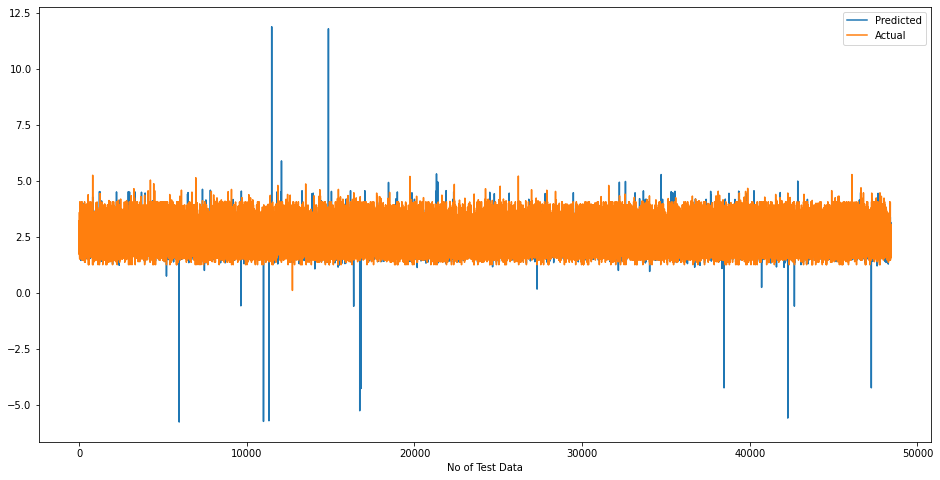

In [ ]:
# Plot the figure
plt.figure(figsize=(16,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

### **Lasso Regression**

Lasso regression stands for Least Absolute Shrinkage and Selection Operator. It adds penalty term to the cost function. This term is the absolute sum of the coefficients. As the value of coefficients increases from 0 this term penalizes, cause model, to decrease the value of coefficients in order to reduce loss. The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero.

**Limitation of Lasso Regression**:
Lasso sometimes struggles with some types of data. If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant (or may be used in the test set).
If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data

In [ ]:
# Creating an instance of Lasso Regression implementation
lasso = Lasso(alpha=0.01, max_iter=3000)

# Fitting the Lasso model
lasso.fit(X_train, y_train)

# Model Score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.6927759449212096 0.6981339759550023


In [ ]:
# Predict for training data
y_pred_train_lasso=lasso.predict(X_train)

# Predict for testing data
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
# calculating MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

# calculating RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


# calculating MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


# calculating r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_l )


MSE : 0.0896211078535623
RMSE : 0.299367847060372
MAE : 0.19141185494822716
R2 : 0.6981339759550023
Adjusted R2 : 0.6980653672053743


In [ ]:
# storing the train set metrics value in the train evaluation dataframe
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df = training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

# calculating RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


# calculating MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


# calculating r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_l )

MSE : 0.09209491971326712
RMSE : 0.3034714479374742
MAE : 0.1921689257874498
R2 : 0.6927759449212096
Adjusted R2 : 0.6927061183869341


In [ ]:
# storing the test set metrics value in the test evaluation dataframe
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

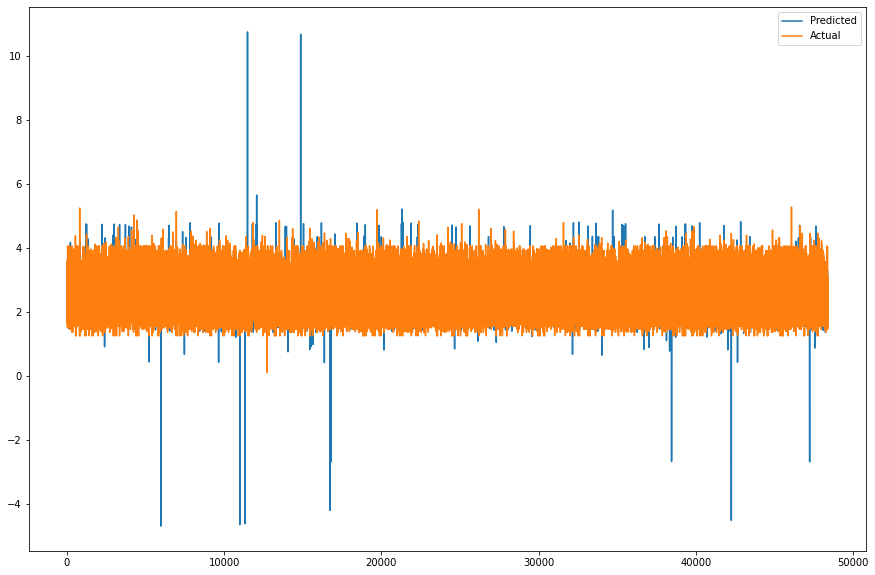

In [ ]:
#Plot the actual vs predicted graph.
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### **Ridge Regression**

In Ridge regression, we add a penalty term which is equal to the square of the coefficient. The L2 term is equal to the square of the magnitude of the coefficients. We also add a coefficient  lambda  to control that penalty term. In this case if  lambda  is zero then the equation is the basic OLS else if  lambda  >  0 then it will add a constraint to the coefficient. As we increase the value of lambda this constraint causes the value of the coefficient to tend towards zero. This leads to tradeoff of higher bias (dependencies on certain coefficients tend to be 0 and on certain coefficients tend to be very large, making the model less flexible) for lower variance.

**Limitation of Ridge Regression**: Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction.

In [ ]:
# Creating the model object
ridge= Ridge(alpha=0.1)

In [ ]:
# FITTING THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# checking the score
ridge.score(X_train, y_train)

0.7023192463421257

In [ ]:
# predict for train data
y_pred_train_ridge=ridge.predict(X_train)

# predict for test data
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
# calculating MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

# calculating RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


# calculating MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


# calculating r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_r)

MSE : 0.08837854148675317
RMSE : 0.2972852863610192
MAE : 0.18437668480156838
R2 : 0.7023192463421257
Adjusted R2 : 0.7022515888296204


In [ ]:
# storing the train set metrics value in the train evaluation dataframe 
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

# calculating RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


# calculating MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


# calculating r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_r)

MSE : 0.09150182543644132
RMSE : 0.3024926865833971
MAE : 0.1850872079370399
R2 : 0.6947544778233259
Adjusted R2 : 0.694685100974201


In [ ]:
# storing the test set metrics value in the test evaluation dataframe
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

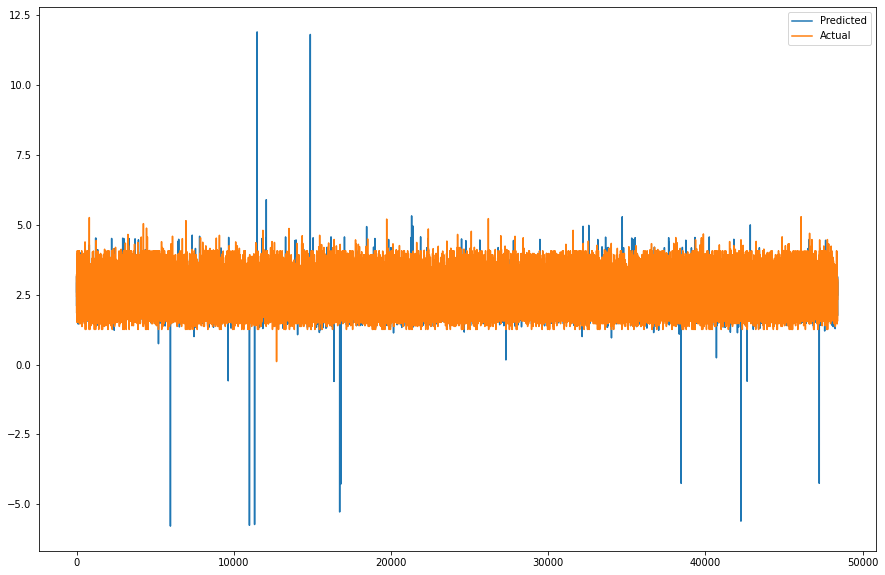

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### **Elastic Net Regression**

Sometimes, the lasso regression can cause a small bias in the model where the prediction is too dependent upon a particular variable. In these cases, elastic Net is proved to better it combines the regularization of both lasso and Ridge. The advantage of that it does not easily eliminate the high collinearity coefficient.

In [ ]:
# creating a model object.
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
# FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
# check the score
elasticnet.score(X_train, y_train)

0.5699852367905041

In [ ]:
# predict on train data
y_pred_train_en=elasticnet.predict(X_train)

# predict on test data
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
# calculating MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

# calculating RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


# calculating MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


# calculating r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_e)

MSE : 0.12766723116370843
RMSE : 0.35730551515993764
MAE : 0.250659218516937
R2 : 0.5699852367905041
Adjusted R2 : 0.5698875021238793


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

# calculating RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


# calculating MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


# calculating r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)

Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_e)

MSE : 0.12780301730646887
RMSE : 0.35749547872171594
MAE : 0.2511182946579178
R2 : 0.5736555137846349
Adjusted R2 : 0.5735586133063431


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

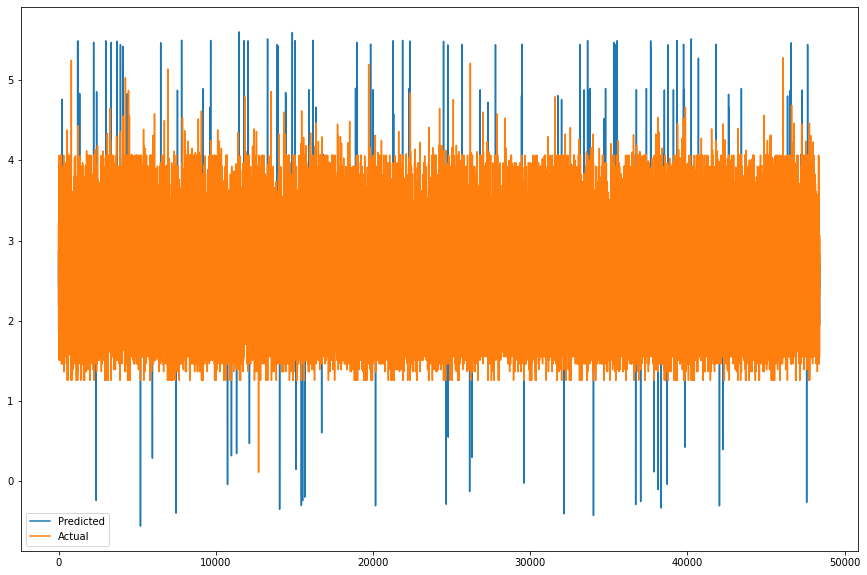

In [ ]:
# Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# display test evaluation dataframe
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,0.185,0.092,0.302,0.695,0.69
1,Lasso regression,0.192,0.092,0.303,0.693,0.69
2,Ridge regression,0.185,0.092,0.302,0.695,0.69
3,Elastic net regression Test,0.251,0.128,0.357,0.574,0.57


###**Decision Tree**

Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.

In a Decision Tree diagram, we have:

**Root Node**: The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets. In our case, the Outlook node.

**Splitting**: It is a process of dividing a node into two or more sub-nodes.

**Decision Node**: This node decides whether/when a sub-node splits into further sub-nodes or not. Here we have, Outlook node, Humidity node, and Windy node.

**Leaf**: Terminal Node that predicts the outcome (categorical or continuous value). The coloured nodes, i.e., Yes and No nodes, are the leaves.

In [ ]:
# building the model
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=8, max_leaf_nodes=100)
# fitting training data to the model
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=8,
                      max_leaf_nodes=100)

In [ ]:
# predict for train data
y_pred_train_d = decision_regressor.predict(X_train)

# predict for test data
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
# calculating model score
print("Model Score:",decision_regressor.score(X_train,y_train))

# calculating MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)

# calculating r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d)


Model Score: 0.8166822130104971
MSE : 0.05442528092135863
RMSE : 0.2332922650268513
MAE : 0.1603195912261818
R2 : 0.8166822130104971
Adjusted R2 : 0.8166405481554022


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:

# calculating MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


# calculating r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d)


MSE : 0.05753182303636448
RMSE : 0.23985792260495478
MAE : 0.16242904202506853
R2 : 0.8080767101558047
Adjusted R2 : 0.808033089423785


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# display train evaluation dataframe.
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,0.184,0.088,0.297,0.702,0.70
1,Lasso regression,0.191,0.090,0.299,0.698,0.70
2,Ridge regression,0.184,0.088,0.297,0.702,0.70
3,Elastic net regression,0.251,0.128,0.357,0.570,0.57
4,Decision tree regression,0.160,0.054,0.233,0.817,0.82


In [ ]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,0.185,0.092,0.302,0.695,0.69
1,Lasso regression,0.192,0.092,0.303,0.693,0.69
2,Ridge regression,0.185,0.092,0.302,0.695,0.69
3,Elastic net regression Test,0.251,0.128,0.357,0.574,0.57
4,Decision tree regression,0.162,0.058,0.240,0.808,0.81


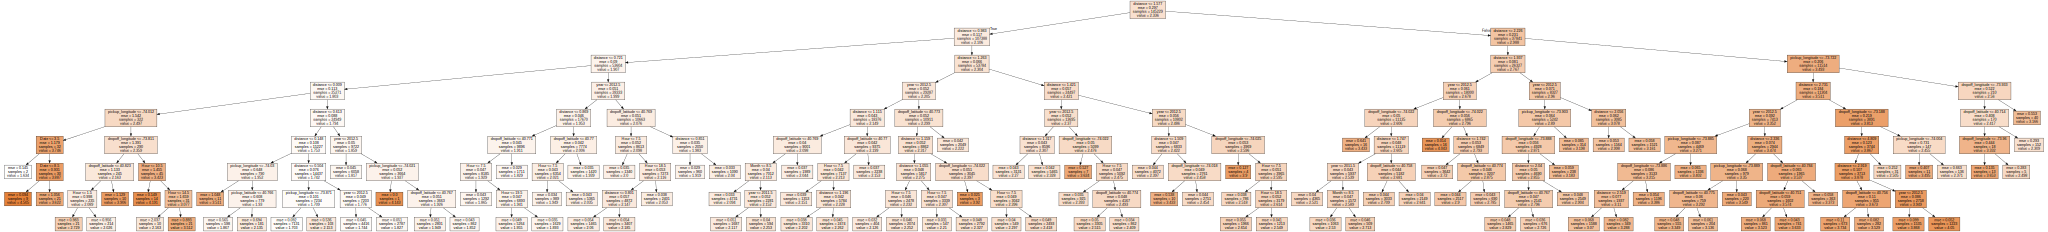

In [ ]:

# DOT data
dot_data = tree.export_graphviz(decision_regressor, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names='views',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render

# Display graph
graph

### **Random Forest**

Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.

In [ ]:
# Create an instance of the RandomForestRegressor.
rf_model = RandomForestRegressor(n_estimators = 10, max_depth = 10)

# fitting the train data in model.
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10)

In [ ]:
# predict for train data.
y_pred_train_r = rf_model.predict(X_train)

# predict for test data.
y_pred_test_r = rf_model.predict(X_test)


In [ ]:
# calculating model score.
print("Model Score:",rf_model.score(X_train,y_train))

# calculating MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


# calculating r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )


Model Score: 0.8476822472467825
MSE : 0.045221670079284806
RMSE : 0.21265387388732143
MAE : 0.1454184412121208
R2 : 0.8476822472467825
Adjusted R2 : 0.8476476281451608


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)

# Calculating adjusted r2
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf )


MSE : 0.05184364365367238
RMSE : 0.22769199295028444
MAE : 0.15157308153545368
R2 : 0.8270521926406924
Adjusted R2 : 0.8270128846965428


In [ ]:
# storing the test set metrics value in the test evaluation dataframe.
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# feature importances for random forest model
rf_model.feature_importances_

array([8.41865686e-03, 3.97067249e-03, 1.24375891e-02, 1.07129380e-02,
       6.41123266e-04, 2.36425474e-02, 2.26250298e-03, 1.51496437e-03,
       1.62059345e-03, 7.52748216e-03, 9.27250930e-01])

In [ ]:
# storing feature importances in a dataframe.
importances = rf_model.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [ ]:
# rounding off the values.
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
# sort features according to their importance.
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
10,distance,0.93
5,year,0.02
0,pickup_longitude,0.01
2,dropoff_longitude,0.01
3,dropoff_latitude,0.01
9,Hour,0.01
1,pickup_latitude,0.00
4,passenger_count,0.00
6,Month,0.00
7,Date,0.00


In [ ]:
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,0.184,0.088,0.297,0.702,0.70
1,Lasso regression,0.191,0.090,0.299,0.698,0.70
2,Ridge regression,0.184,0.088,0.297,0.702,0.70
3,Elastic net regression,0.251,0.128,0.357,0.570,0.57
4,Decision tree regression,0.160,0.054,0.233,0.817,0.82
5,Random forest regression,0.145,0.045,0.213,0.848,0.85


In [ ]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,0.185,0.092,0.302,0.695,0.69
1,Lasso regression,0.192,0.092,0.303,0.693,0.69
2,Ridge regression,0.185,0.092,0.302,0.695,0.69
3,Elastic net regression Test,0.251,0.128,0.357,0.574,0.57
4,Decision tree regression,0.162,0.058,0.240,0.808,0.81
5,Random forest regression,0.152,0.052,0.228,0.827,0.83


###**XGB Regressor**

XGBoost is a powerful approach for building supervised regression models. The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

In [ ]:
# making a model object of XGB regressor.
model = XGBRegressor()

# fitting train data in XGB model. 
model.fit(X_train, y_train)

[17:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# predict on train data.
y_pred_train_xgb = model.predict(X_train)

# predict on test data.
y_pred_test_xgb = model.predict(X_test)

In [ ]:
# calculating model score on train data.
print("Model Score:", model.score(X_train,y_train))

# calculating MSE
MSE_d= mean_squared_error(y_train, y_pred_train_xgb)
print("MSE :", MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :", RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :", MAE_d)

# calculating r2
r2_d= r2_score(y_train, y_pred_train_xgb)
print("R2 :", r2_d)

# calculating adjusted r2
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0] - X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d )


Model Score: 0.8337408290344033
MSE : 0.04936074253434521
RMSE : 0.22217277631236734
MAE : 0.14968067134374866
R2 : 0.8337408290344033
Adjusted R2 : 0.8337030412977071


In [ ]:
# storing the train matrics in the train evaluation dataframe
dict1={'Model':'XGBoost Regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_d= mean_squared_error(y_test, y_pred_test_xgb)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_xgb)
print("MAE :",MAE_d)

# calculating r2
r2_d= r2_score((y_test), (y_pred_test_xgb))
print("R2 :",r2_d)

# calculating adjusted r2
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d )

MSE : 0.0507704434526587
RMSE : 0.2253229758649985
MAE : 0.15090163892911962
R2 : 0.8306323349405429
Adjusted R2 : 0.8305938406987219


In [ ]:
# storing the test matrics in the test evaluation dataframe
dict2={'Model':'XGBoost regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,0.184,0.088,0.297,0.702,0.70
1,Lasso regression,0.191,0.090,0.299,0.698,0.70
2,Ridge regression,0.184,0.088,0.297,0.702,0.70
3,Elastic net regression,0.251,0.128,0.357,0.570,0.57
4,Decision tree regression,0.160,0.054,0.233,0.817,0.82
5,Random forest regression,0.145,0.045,0.213,0.848,0.85
6,XGBoost Regression,0.150,0.049,0.222,0.834,0.83


In [ ]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,0.185,0.092,0.302,0.695,0.69
1,Lasso regression,0.192,0.092,0.303,0.693,0.69
2,Ridge regression,0.185,0.092,0.302,0.695,0.69
3,Elastic net regression Test,0.251,0.128,0.357,0.574,0.57
4,Decision tree regression,0.162,0.058,0.240,0.808,0.81
5,Random forest regression,0.152,0.052,0.228,0.827,0.83
6,XGBoost regression,0.151,0.051,0.225,0.831,0.83


## **Conclusion**

We observed that our most significant feature was 'distnace' which we derived during Feature Engineering. It did wonders for the model accuracy as it's the one which has the maximum correlation with the target variable fare_amount.

We were able to see that the linear algorithms were  performing optimally, and the tree-based algorithms performed significantly better. 

Out of the tree-based algorithms, the Random Forest Regressor was providing an optimal solution towards achieving our Objective. We were able to achieve an R2 score of 0.85 in the train split, and 0.83 in the test split. We also noticed that even in the case of Decision tree, we were able to achieve an R2 score of 0.81 in the test split. Also the XGBoost Regression was delivering the R2 score for train and test split as  0.834 and 0.830 respectively.
